In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

In [3]:
housing = pd.read_csv('Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
len(housing.index)

545

In [5]:
df = housing.loc[:,['area','price']]
df.head()

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000


In [6]:
df_columns = df.columns
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

df = pd.DataFrame(df)
df.columns = df_columns
df.head()

,area,price
0,0.396564,1.000000
1,0.502405,0.909091
2,0.571134,0.909091
3,0.402062,0.906061
4,0.396564,0.836364


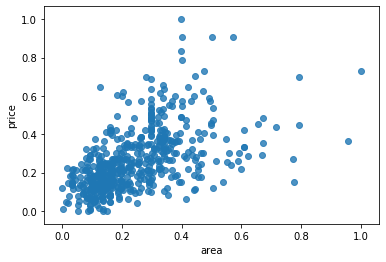

In [7]:
sns.regplot(x='area', y='price', data=df, fit_reg=False)

In [8]:
df_train, df_test = train_test_split(df,
                                     train_size = 0.7,
                                     test_size = 0.3,
                                     random_state = 10
                                    )
print(len(df_train))
print(len(df_test))

381
164


In [9]:
X_train = df_train['area']
X_train = X_train.values.reshape(-1,1)
Y_train = df_train['price']

X_test = df_test['area']
X_test = X_test.values.reshape(-1,1)
Y_test = df_test['price']

In [10]:
degrees = [1,2,3,6,10,20]
y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))

for i, degree in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, Y_train)
    
    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)

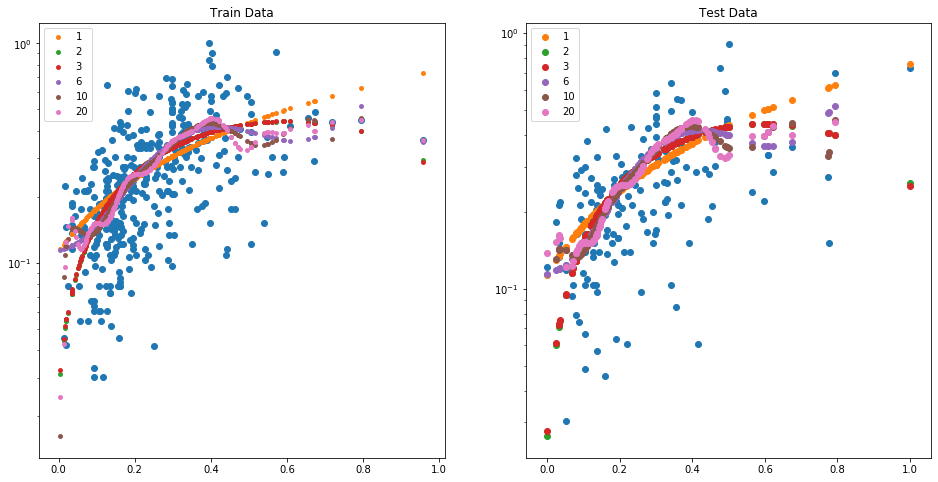

In [11]:
plt.figure(figsize=(16,8))

plt.subplot(121)
plt.scatter(X_train, Y_train)
plt.yscale('log')
plt.title('Train Data')

for i, degree in enumerate(degrees):
    plt.scatter(X_train, y_train_pred[:,i], s=15, label=str(degree))
    plt.legend(loc='upper left')
plt.subplot(122)
plt.scatter(X_test, Y_test)
plt.yscale('log')
plt.title('Test Data')
for i, degree in enumerate(degrees):
    plt.scatter(X_test, y_test_pred[:,i], label=str(degree))
    plt.legend(loc='upper left')

In [12]:
print('R Score value\n')
for i, degree in enumerate(degrees):
    train_r2 = round(sklearn.metrics.r2_score(Y_train, y_train_pred[:,i]),2)
    test_r2 = round(sklearn.metrics.r2_score(Y_test, y_test_pred[:,i]),2)
    print('Polynomial Degree {}, Train score: {} Test score {}'.format(degree,
                                                                   train_r2,
                                                                   test_r2))

R Score value

Polynomial Degree 1, Train score: 0.29 Test score 0.25
Polynomial Degree 2, Train score: 0.34 Test score 0.22
Polynomial Degree 3, Train score: 0.34 Test score 0.22
Polynomial Degree 6, Train score: 0.36 Test score 0.11
Polynomial Degree 10, Train score: 0.37 Test score -108.76
Polynomial Degree 20, Train score: 0.38 Test score -307071892461.64


In [13]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [14]:
binary_var_list = ['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea']

def binary_map(x):
    return x.map({'yes':1,'no':2})
housing[binary_var_list] = housing[binary_var_list].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,2,2,2,1,2,1,furnished
1,12250000,8960,4,4,4,1,2,2,2,1,3,2,furnished
2,12250000,9960,3,2,2,1,2,1,2,2,2,1,semi-furnished
3,12215000,7500,4,2,2,1,2,1,2,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,2,1,2,2,furnished


In [15]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first=True)

In [16]:
housing = pd.concat([housing, status], axis=1)
housing.drop('furnishingstatus', axis=1, inplace= True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,2,2,2,1,2,1,0,0
1,12250000,8960,4,4,4,1,2,2,2,1,3,2,0,0
2,12250000,9960,3,2,2,1,2,1,2,2,2,1,1,0
3,12215000,7500,4,2,2,1,2,1,2,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,2,1,2,2,0,0


In [17]:
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)
scaler = MinMaxScaler()
numarical_var = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_train[numarical_var] = scaler.fit_transform(df_train[numarical_var])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,2,2,2,2,0.333333,2,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,2,2,2,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,2,1,0.000000,2,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,2,2,2,1,0.666667,2,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,2,1,1,2,0.666667,2,0,1


In [18]:
df_test[numarical_var] = scaler.fit_transform(df_test[numarical_var])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.247651,0.084536,0.333333,0.000000,0.333333,1,2,2,2,2,0.000000,1,1,0
54,0.530201,0.298969,0.333333,0.333333,0.333333,1,1,2,2,1,0.333333,2,1,0
171,0.328859,0.592371,0.333333,0.000000,0.000000,1,2,2,2,2,0.333333,1,1,0
244,0.261745,0.252234,0.333333,0.000000,0.333333,1,1,1,2,2,0.000000,1,1,0
268,0.245638,0.226804,0.666667,0.000000,0.333333,1,2,2,2,1,0.000000,2,1,0


In [19]:
Y_train = df_train.pop('price')
X_train = df_train

Y_test = df_test.pop('price')
X_test = df_test

In [22]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

rfe = RFE(lm, n_features_to_select = 10)
rfe = rfe.fit(X_train, Y_train)

In [23]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [24]:
Y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(Y_test, Y_pred)
print(r2)

0.581205145899957


In [27]:
lm = LinearRegression()
scores = cross_val_score(lm, X_train, Y_train, scoring='r2',cv=5)
scores

array([0.6829775 , 0.69324306, 0.6762109 , 0.61782891, 0.59266171])

In [29]:
folds = KFold(n_splits=5, shuffle=True, random_state=100)
scores = cross_val_score(lm, X_train, Y_train, scoring='r2',cv=folds)
scores

array([0.59930574, 0.71307628, 0.61325733, 0.62739077, 0.6212937 ])

In [30]:
folds = KFold(n_splits = 5, shuffle=True, random_state=100)
hypar_params = [{'n_features_to_select': list(range(1,14))}]

lm=LinearRegression()
lm.fit(X_train, Y_train)
rfe = RFE(lm)

model_cv = GridSearchCV(estimator=rfe, param_grid = hypar_params,
                       scoring = 'r2',
                       cv=folds,
                       verbose = 1,
                       return_train_score=True)
model_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    3.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [31]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.108477,0.020786,0.007805,0.000749,1,{'n_features_to_select': 1},0.172606,0.351721,0.206887,0.165910,...,0.243658,0.077627,13,0.302971,0.265961,0.280611,0.300768,0.269025,0.283867,0.015506
1,0.078055,0.008130,0.008006,0.000633,2,{'n_features_to_select': 2},0.335665,0.428751,0.439969,0.505321,...,0.438360,0.058374,12,0.505799,0.489802,0.462091,0.474178,0.471907,0.480755,0.015355
2,0.055440,0.007342,0.007005,0.000894,3,{'n_features_to_select': 3},0.421848,0.539257,0.491515,0.604426,...,0.516805,0.059902,11,0.568074,0.544917,0.542889,0.534685,0.542412,0.546596,0.011289
3,0.055640,0.006535,0.007605,0.001857,4,{'n_features_to_select': 4},0.449487,0.567101,0.494461,0.600237,...,0.526272,0.053074,10,0.587523,0.564018,0.549490,0.541496,0.549291,0.558364,0.016296
4,0.054839,0.006708,0.005403,0.001626,5,{'n_features_to_select': 5},0.494779,0.610200,0.492807,0.590812,...,0.541889,0.049257,8,0.620038,0.597033,0.584663,0.549413,0.589397,0.588109,0.022847
5,0.044232,0.006311,0.005204,0.000747,6,{'n_features_to_select': 6},0.512477,0.628849,0.488411,0.527379,...,0.541063,0.048029,9,0.626959,0.603122,0.596348,0.606852,0.601063,0.606869,0.010602
6,0.032022,0.003745,0.005804,0.001167,7,{'n_features_to_select': 7},0.568887,0.664093,0.552385,0.534634,...,0.577636,0.045006,7,0.658577,0.638501,0.630137,0.646285,0.638313,0.642363,0.009582
7,0.026820,0.001471,0.004804,0.001168,8,{'n_features_to_select': 8},0.570639,0.665608,0.592323,0.550001,...,0.591795,0.039428,6,0.674146,0.640825,0.654028,0.658665,0.657277,0.656988,0.010651
8,0.043431,0.024794,0.006604,0.003385,9,{'n_features_to_select': 9},0.578843,0.694189,0.606220,0.590777,...,0.615352,0.040767,4,0.676043,0.652605,0.659579,0.668996,0.664321,0.664309,0.007988
9,0.032623,0.010138,0.009206,0.003372,10,{'n_features_to_select': 10},0.574376,0.693197,0.601972,0.594335,...,0.608547,0.043498,5,0.686032,0.661729,0.674558,0.678443,0.677153,0.675583,0.007910


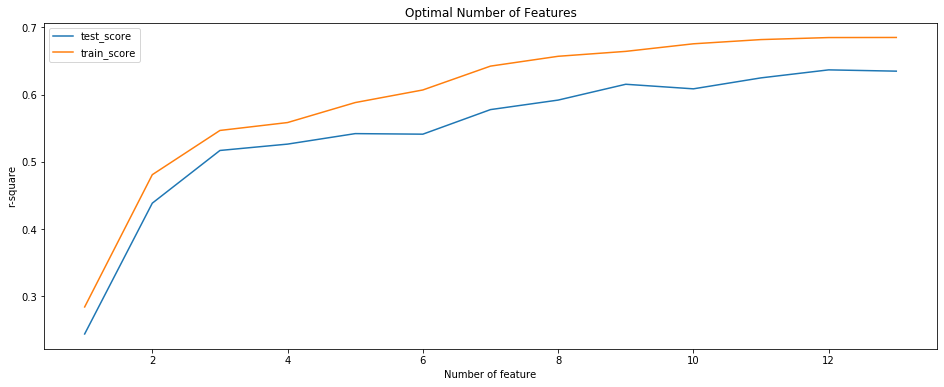

In [32]:
plt.figure(figsize=(16,6))

plt.plot(cv_results['param_n_features_to_select'], cv_results['mean_test_score'])
plt.plot(cv_results['param_n_features_to_select'], cv_results['mean_train_score'])
plt.xlabel('Number of feature')
plt.ylabel('r-square')
plt.title('Optimal Number of Features')
plt.legend(['test_score', 'train_score'], loc='upper left')